In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
from tqdm import tqdm

sympy.init_printing()

In [2]:
A, B, C, D, E, F, G, H = sympy.symbols("A B C D E F G H")

In [3]:
theta, tau = sympy.symbols("theta tau")

In [4]:
r_tilde = sympy.symbols("\\tilde{r}", real=True)

In [5]:
delta_r, delta_theta, W, xi = sympy.symbols("Delta_r Delta_theta W Xi")

In [6]:
dt, dr_tilde, dtheta, dphi, dphi_tilde, dtau = sympy.symbols(r"dt d\tilde{r} d\theta d\phi d\tilde{\phi} d\tau")

In [7]:
a, r_tilde_plus = sympy.symbols("a \\tilde{r}_+")

### Metric

In [8]:
metric_orig = -delta_r / W * (dt - a * sympy.sin(theta) ** 2 * dphi / xi) ** 2
metric_orig += delta_theta * sympy.sin(theta) ** 2 / W * (a * dt - (r_tilde ** 2 + a ** 2) * dphi / xi) ** 2
metric_orig += W * dr_tilde ** 2 / delta_r
metric_orig

In [9]:
dt_val = sympy.I * dtau

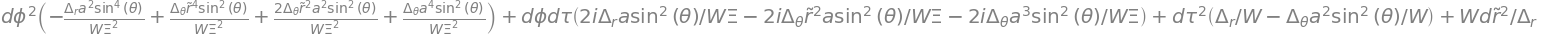

In [10]:
euclidean_metric = metric_orig.subs({dt: dt_val}).expand().collect([dtau ** 2, dtau * dphi, dphi ** 2])
euclidean_metric

In [11]:
omega = sympy.symbols("Omega")
dphi_val = dphi_tilde + omega * dt_val
dphi_val

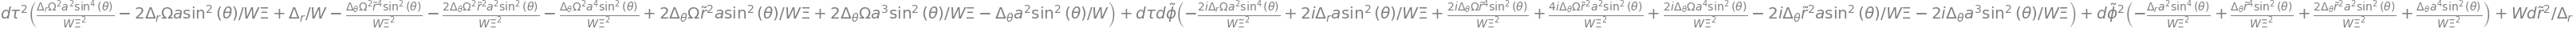

In [12]:
euclidean_metric_2 = euclidean_metric.subs({dphi: dphi_val}).expand().collect([dtau ** 2, dtau * dphi_tilde, dphi_tilde ** 2])
euclidean_metric_2

In [13]:
metric_list_matrix = [[0 for i in range(3)] for i in range(3)]

# tau
metric_list_matrix[0][0] = euclidean_metric_2.coeff(dtau ** 2)
metric_list_matrix[0][1] = euclidean_metric_2.coeff(dtau * dr_tilde) / 2
metric_list_matrix[0][2] = euclidean_metric_2.coeff(dtau * dphi_tilde) / 2

# r_tilde
metric_list_matrix[1][0] = euclidean_metric_2.coeff(dr_tilde * dtau) / 2
metric_list_matrix[1][1] = euclidean_metric_2.coeff(dr_tilde ** 2)
metric_list_matrix[1][2] = euclidean_metric_2.coeff(dr_tilde * dphi_tilde) / 2

# phi_tilde
metric_list_matrix[2][0] = euclidean_metric_2.coeff(dphi_tilde * dtau) / 2
metric_list_matrix[2][1] = euclidean_metric_2.coeff(dphi_tilde * dr_tilde) / 2
metric_list_matrix[2][2] = euclidean_metric_2.coeff(dphi_tilde ** 2)

In [14]:
g_mat = sympy.Matrix(metric_list_matrix)
g_mat.simplify()
g_mat

⎡ 2 ⎛    2    2                      4                     2  2           4⎞  
⎢Ω ⋅⎝Δᵣ⋅a ⋅sin (θ) - Δₜₕₑₜₐ⋅\tilde{r}  - 2⋅Δₜₕₑₜₐ⋅\tilde{r} ⋅a  - Δₜₕₑₜₐ⋅a ⎠⋅s
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                     ⎛  ⎛      2    2                      4                 
⎢                   ⅈ⋅⎝Ω⋅⎝- Δᵣ⋅a ⋅sin (θ) + Δₜₕₑₜₐ⋅\tilde{r}  + 2⋅Δₜₕₑₜₐ⋅\tild
⎢                   ────────────────────────────────

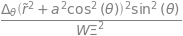

In [15]:
g_mat.det().simplify()

#### $\Delta_r$

In [16]:
z_r, z_i = sympy.symbols("z_r z_i")
delta_r_val = z_r + sympy.I * z_i
delta_r_val

In [17]:
real_delta_r = r_tilde ** 4 - r_tilde_plus ** 4 + (r_tilde_plus - r_tilde) ** 2 * (a + 1) ** 2 + 2 * a * (r_tilde_plus ** 2 - r_tilde ** 2)
real_delta_r

In [18]:
imag_delta_r = 2 * (r_tilde_plus - r_tilde) * (a + 1) * (r_tilde_plus ** 2 - a)
imag_delta_r

In [19]:
delta_theta_val = 1 - a ** 2 * sympy.cos(theta) ** 2
xi_val = 1 - a ** 2
W_val = r_tilde ** 2 + a ** 2 * sympy.cos(theta) ** 2
omega_val = a * xi / (r_tilde_plus ** 2 + a ** 2)

In [20]:
g_mat_subs = g_mat.subs({delta_r: delta_r_val})
g_mat_subs

⎡ 2 ⎛                  4                     2  2           4    2            
⎢Ω ⋅⎝- Δₜₕₑₜₐ⋅\tilde{r}  - 2⋅Δₜₕₑₜₐ⋅\tilde{r} ⋅a  - Δₜₕₑₜₐ⋅a  + a ⋅(ⅈ⋅zᵢ + zᵣ)
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                          ⎛  ⎛                4                     2  2     
⎢                        ⅈ⋅⎝Ω⋅⎝Δₜₕₑₜₐ⋅\tilde{r}  + 2⋅Δₜₕₑₜₐ⋅\tilde{r} ⋅a  + Δₜ
⎢                        ───────────────────────────

#### A and B coefficients

In [21]:
g_00 = sympy.fraction(g_mat_subs[0, 0])[0].expand().collect(sympy.I)
# g_00 = g_mat_subs[0, 0].expand().collect(sympy.I)
g_00

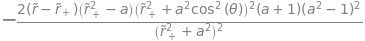

In [22]:
B_val = g_00.coeff(sympy.I).subs({z_i: imag_delta_r, omega: omega_val, xi: xi_val}).simplify()
# B_val = g_00.coeff(sympy.I).subs({z_i: imag_delta_r, omega: omega_val, xi: xi_val, W: W_val}).simplify()
B_val

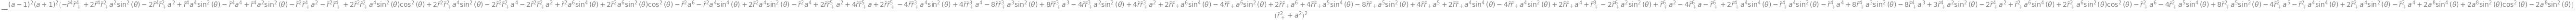

In [23]:
A_val = sum(g_00.args[1:]).subs({z_r: real_delta_r, omega: omega_val}).subs({delta_theta: delta_theta_val, xi: xi_val, W: W_val}).expand().simplify().factor()
A_val

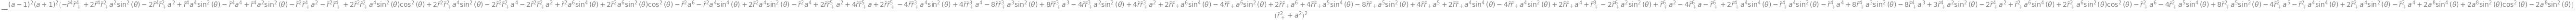

In [24]:
A_val_2 = delta_r * (xi - a * omega * sympy.sin(theta) ** 2) ** 2 - delta_theta * sympy.sin(theta) ** 2 * (a * xi - omega * (r_tilde ** 2 + a ** 2)) ** 2
A_val_2 = A_val_2.subs({delta_r: real_delta_r}).simplify()
# A_val_2 = (A_val_2 / (W * xi ** 2)).subs({delta_r: real_delta_r}).simplify()
A_val_2 = A_val_2.subs({omega: omega_val}).subs({delta_theta: delta_theta_val, xi: xi_val, W: W_val}).expand().simplify().factor()
A_val_2

In [25]:
(A_val - A_val_2).simplify()

#### C and D coefficients

In [26]:
# g_02 = g_mat_subs[0, 2].expand().collect(sympy.I)
g_02 = sympy.fraction(g_mat_subs[0, 2])[0].expand().collect(sympy.I)
g_02

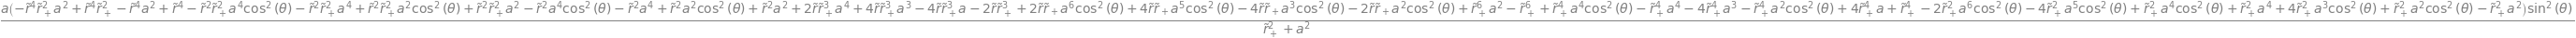

In [27]:
D_val = g_02.coeff(sympy.I).subs({z_r: real_delta_r}).simplify()
D_val = D_val.subs({W: W_val, xi: xi_val, omega: omega_val, delta_theta: delta_theta_val}).expand().simplify()
D_val

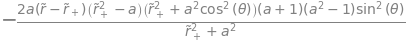

In [28]:
C_val = sum(g_02.args[1:]).subs({omega: omega_val}).subs({z_i: imag_delta_r, W: W_val, xi: xi_val}).simplify()
C_val

#### E and F coefficients

In [29]:
# g_22 = g_mat_subs[2, 2].expand().collect(sympy.I)
g_22 = sympy.fraction(g_mat_subs[2, 2])[0].expand().collect(sympy.I)
g_22

In [30]:
F_val = g_22.coeff(sympy.I).subs({z_i: imag_delta_r, W: W_val, xi: xi_val}).simplify()
F_val

In [31]:
E_val = g_22 - g_22.coeff(sympy.I) * sympy.I
E_val = E_val.subs({z_r: real_delta_r, W: W_val, xi: xi_val, delta_theta: delta_theta_val}).expand().simplify()
E_val

#### G and H coefficients

In [32]:
g_11_num, g_11_denom = sympy.fraction(g_mat_subs[1, 1])
g_11_num, g_11_denom

In [33]:
g_11_num = (g_11_num * (z_r - sympy.I * z_i)).subs({W: W_val}).subs({z_i: imag_delta_r, z_r: real_delta_r}).expand().collect(sympy.I)
g_11_num

In [34]:
g_11_denom = (g_11_denom * (z_r - sympy.I * z_i)).simplify().subs({z_r: real_delta_r, z_i: imag_delta_r}).simplify()
g_11_denom

In [35]:
H_val = g_11_num.coeff(sympy.I).simplify()
# H_val = (g_11_num.coeff(sympy.I) / g_11_denom).simplify()
H_val

In [36]:
G_val = (g_11_num - g_11_num.coeff(sympy.I) * sympy.I).simplify()
# G_val = ((g_11_num - g_11_num.coeff(sympy.I) * sympy.I) / g_11_denom).simplify()
G_val

#### Eigenvalues

In [37]:
beta = (A * F + B * E - 2 * C * D) ** 2 - 4 * (A * E - C ** 2) * (B * F - D ** 2)
beta

In [38]:
def cond_sym(theta_val, r_tilde_plus_val, a_val, thres=0):
    vals_dict = {}
    for var_name, var_val in [(A, A_val), (B, B_val), (C, C_val), (D, D_val), (E, E_val), (F, F_val), (G, G_val), (H, H_val)]:
        vals_dict[var_name] = var_val.subs({theta: theta_val, r_tilde_plus: r_tilde_plus_val, a: a_val})

    beta_val = beta.subs(vals_dict).simplify().evalf()
    lambda_r = (H / G).subs(vals_dict).evalf()

    # beta_val < 0:
    lambda_plus_real_val = 1 + sympy.sqrt(-beta_val) / (2 * (A * E - C ** 2))
    lambda_plus_real_val = lambda_plus_real_val.subs(vals_dict).simplify().evalf()
    lambda_minus_real_val = 1 - sympy.sqrt(-beta_val) / (2 * (A * E - C ** 2))
    lambda_minus_real_val = lambda_minus_real_val.subs(vals_dict).simplify().evalf()

    lambda_imag_val = (A * F + B * E - 2 * C * D) / (2 * (A * E - C ** 2))
    lambda_imag_val = lambda_imag_val.subs(vals_dict).simplify().evalf()

    # beta_val >= 0
    lambda_plus_imag_val = (A * F + B * E - 2 * C * D + sympy.sqrt(beta_val)) / (2 * (A * E - C ** 2))
    lambda_plus_imag_val = lambda_plus_imag_val.subs(vals_dict).simplify().evalf()
    lambda_minus_imag_val = (A * F + B * E - 2 * C * D - sympy.sqrt(beta_val)) / (2 * (A * E - C ** 2))
    lambda_minus_imag_val = lambda_minus_imag_val.subs(vals_dict).simplify().evalf()

    angle_1 = sympy.Piecewise(
        (sympy.Abs(sympy.atan2(lambda_imag_val, lambda_plus_real_val)).evalf(), beta_val < thres),
        (sympy.Abs(sympy.atan2(lambda_plus_imag_val, 1)).evalf(), beta_val >= thres)
    )

    angle_2 = sympy.Piecewise(
        (sympy.Abs(sympy.atan2(lambda_imag_val, lambda_minus_real_val)).evalf(), beta_val < thres),
        (sympy.Abs(sympy.atan2(lambda_minus_imag_val, 1)).evalf(), beta_val >= thres)
    )

    angle_3 = sympy.Abs(sympy.atan2(lambda_r, 1))

    return angle_1, angle_2, angle_3

In [152]:
theta_val = np.pi / 8
r_tilde_plus_val = 0.85
a_val = 0.85

In [153]:
angle_1, angle_2, angle_3 = cond_sym(theta_val, r_tilde_plus_val, a_val)

In [154]:
angle_1

⎧│     ⎛                                                                      
⎪│     ⎜                                                         5            
⎪│     ⎜                            0.00203922299858519⋅\tilde{r}  - 0.0017333
⎪│atan2⎜──────────────────────────────────────────────────────────────────────
⎪│     ⎜                             8                               6        
⎪│     ⎝0.00525429642048233⋅\tilde{r}  + 0.0164721127567439⋅\tilde{r}  - 0.019
⎨                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎩                                                   

In [155]:
angle_2

⎧│     ⎛                                                                      
⎪│     ⎜                                                         5            
⎪│     ⎜                            0.00203922299858519⋅\tilde{r}  - 0.0017333
⎪│atan2⎜──────────────────────────────────────────────────────────────────────
⎪│     ⎜                             8                               6        
⎪│     ⎝0.00525429642048233⋅\tilde{r}  + 0.0164721127567439⋅\tilde{r}  - 0.019
⎨                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎩                                                   

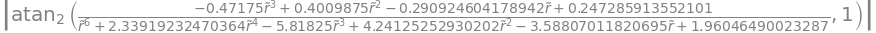

In [156]:
angle_3

In [157]:
def diff_angles_pi(r_tilde_val):
    r_tilde_val = r_tilde_val[0]
    angle_1, angle_2, angle_3 = cond_sym(theta_val, r_tilde_plus_val, a_val)
    sum_of_angles = angle_1.subs({r_tilde: r_tilde_val}).evalf() + angle_2.subs({r_tilde: r_tilde_val}).evalf() + angle_3.subs({r_tilde: r_tilde_val}).evalf()
    diff_angle = float(sum_of_angles - np.pi)
    return diff_angle

In [158]:
diff_angle_1 = sympy.diff(angle_1, r_tilde)
diff_angle_2 = sympy.diff(angle_2, r_tilde)
diff_angle_3 = sympy.diff(angle_3, r_tilde)
diff_tot_angle = diff_angle_1 + diff_angle_2 + diff_angle_3

In [159]:
def deriv_diff_angles(r_tilde_val):
    r_tilde_val = r_tilde_val[0]
    return [diff_tot_angle.subs({r_tilde: r_tilde_val}).evalf()]

In [160]:
from scipy.optimize import fsolve
fsolve(diff_angles_pi, 0, fprime=deriv_diff_angles)

array([-2.01504964e-15])

In [161]:
r_tilde_vals = np.arange(r_tilde_plus_val - 10, r_tilde_plus_val + 10, 0.01)

In [162]:
angle_1_vals = np.zeros(len(r_tilde_vals))
angle_2_vals = np.zeros(len(r_tilde_vals))
angle_3_vals = np.zeros(len(r_tilde_vals))

for i, r_tilde_val in enumerate(r_tilde_vals):
    angle_1_vals[i] = angle_1.subs({r_tilde: r_tilde_val}).evalf()
    angle_2_vals[i] = angle_2.subs({r_tilde: r_tilde_val}).evalf()
    angle_3_vals[i] = angle_3.subs({r_tilde: r_tilde_val}).evalf()

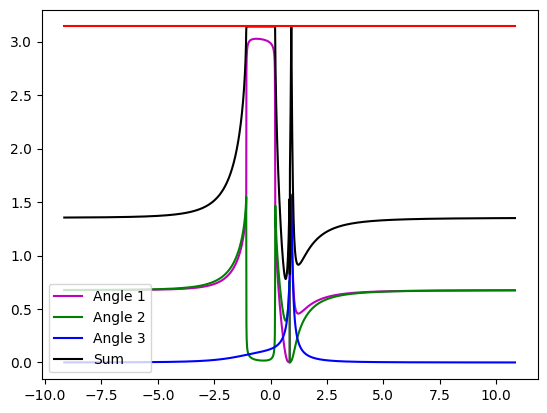

In [185]:
plt.plot(r_tilde_vals, angle_1_vals, 'm-', label='Angle 1')
plt.plot(r_tilde_vals, angle_2_vals, 'g-', label='Angle 2')
plt.plot(r_tilde_vals, angle_3_vals, 'b-', label='Angle 3')
plt.plot(r_tilde_vals, angle_1_vals + angle_2_vals + angle_3_vals, 'k-', label='Sum')
plt.plot([r_tilde_plus_val - 10, r_tilde_plus_val + 10], [np.pi, np.pi], 'r-')
plt.legend(loc='lower left');

In [51]:
def evaluate_cond(r_tilde_val, theta_val, r_tilde_plus_val, a_val):
    vals_dict = {}
    for var_name, var_val in [(A, A_val), (B, B_val), (C, C_val), (D, D_val), (E, E_val), (F, F_val), (G, G_val), (H, H_val)]:
        vals_dict[var_name] = var_val.subs({r_tilde: r_tilde_val, theta: theta_val, r_tilde_plus: r_tilde_plus_val, a: a_val})

    beta_val = beta.subs(vals_dict).evalf()

    if sympy.Abs(sympy.im(beta_val)) < 1e-8:
        beta_val = sympy.re(beta_val)
    else:
        print(f"Beta complex for r = {r_tilde_val}")
        return np.nan, np.nan, np.nan

    if beta_val == sympy.nan:
        print(f"Beta NaN for r = {r_tilde_val}")
        return np.nan, np.nan, np.nan

    if beta_val < 0:
        alpha_plus_real_val = sympy.sqrt(-beta_val) / (2 * (A * E - C ** 2))
        alpha_plus_real_val = alpha_plus_real_val.subs(vals_dict).evalf()
        alpha_plus_imag_val = (A * F + B * E - 2 * C * D) / (2 * (A * E - C ** 2))
        alpha_plus_imag_val = alpha_plus_imag_val.subs(vals_dict).evalf()

        alpha_minus_real_val = -sympy.sqrt(-beta_val) / (2 * (A * E - C ** 2))
        alpha_minus_real_val = alpha_minus_real_val.subs(vals_dict).evalf()
        alpha_minus_imag_val = (A * F + B * E - 2 * C * D) / (2 * (A * E - C ** 2))
        alpha_minus_imag_val = alpha_minus_imag_val.subs(vals_dict).evalf()
    else:
        alpha_plus_imag_val = (A * F + B * E - 2 * C * D + sympy.sqrt(beta_val)) / (2 * (A * E - C ** 2))
        alpha_plus_imag_val = alpha_plus_imag_val.subs(vals_dict).evalf()
        alpha_plus_real_val = 0

        alpha_minus_imag_val = (A * F + B * E - 2 * C * D - sympy.sqrt(beta_val)) / (2 * (A * E - C ** 2))
        alpha_minus_imag_val = alpha_minus_imag_val.subs(vals_dict).evalf()
        alpha_minus_real_val = 0

    if alpha_plus_imag_val == sympy.nan or alpha_plus_real_val == sympy.nan:
        print(f"Alpha plus NaN for r = {r_tilde_val}")
        return np.nan, np.nan, np.nan

    if sympy.Abs(sympy.im(alpha_plus_imag_val)) < 1e-8 and sympy.Abs(sympy.im(alpha_plus_real_val)) < 1e-8:
        alpha_plus_imag_val = sympy.re(alpha_plus_imag_val)
        alpha_plus_real_val = sympy.re(alpha_plus_real_val)
    else:
        print(f"Alpha plus complex for r = {r_tilde_val}")
        return np.nan, np.nan, np.nan

    if alpha_minus_imag_val == sympy.nan or alpha_minus_real_val == sympy.nan:
        print(f"Alpha minus NaN for r = {r_tilde_val}")
        return np.nan, np.nan, np.nan

    if sympy.Abs(sympy.im(alpha_minus_imag_val)) < 1e-8 and sympy.Abs(sympy.im(alpha_minus_real_val)) < 1e-8:
        alpha_minus_imag_val = sympy.re(alpha_minus_imag_val)
        alpha_minus_real_val = sympy.re(alpha_minus_real_val)
    else:
        print(f"Alpha minus complex for r = {r_tilde_val}")
        return np.nan, np.nan, np.nan

    lambda_r = (H / G).subs(vals_dict).evalf()
    if lambda_r == sympy.nan:
        print(f"Lambda r NaN for r = {r_tilde_val}")
        return np.nan, np.nan, np.nan

    angle_1 = sympy.Abs(sympy.atan2(alpha_plus_imag_val, alpha_plus_real_val + 1)).evalf()
    angle_2 = sympy.Abs(sympy.atan2(alpha_minus_imag_val, alpha_minus_real_val + 1)).evalf()
    angle_3 = sympy.Abs(sympy.atan2(lambda_r, 1)).evalf()

    return float(angle_1), float(angle_2), float(angle_3)

In [52]:
a_vals = np.arange(0, 1, 0.01)
r_tilde_plus_vals = np.arange(-1, 1.01, 0.01)
a_vals_grid, r_tilde_plus_vals_grid = np.meshgrid(a_vals, r_tilde_plus_vals)

In [53]:
angle_1_maps = {}
angle_2_maps = {}
angle_3_maps = {}

#### $\theta = \pi/2$

In [54]:
theta_val = np.pi / 2
r_tilde_val_template = 2 * r_tilde_plus

In [427]:
angle_1_map = np.zeros(a_vals_grid.shape, dtype=float)
angle_2_map = np.zeros(a_vals_grid.shape, dtype=float)
angle_3_map = np.zeros(a_vals_grid.shape, dtype=float)

with tqdm(total=np.prod(a_vals_grid.shape)) as pbar:
    for i in range(a_vals_grid.shape[0]):
        for j in range(a_vals_grid.shape[1]):
            r_tilde_val = r_tilde_val_template.subs({r_tilde_plus: r_tilde_plus_vals_grid[i, j]}).evalf()
            angle_1_map[i, j], angle_2_map[i, j], angle_3_map[i, j] = evaluate_cond(
                r_tilde_val, theta_val, r_tilde_plus_vals_grid[i, j], a_vals_grid[i, j]
            )
            pbar.update(1)

angle_1_maps[theta_val, r_tilde_val_template] = angle_1_map
angle_2_maps[theta_val, r_tilde_val_template] = angle_2_map
angle_3_maps[theta_val, r_tilde_val_template] = angle_3_map

100%|██████████| 20100/20100 [09:26<00:00, 35.50it/s]


In [430]:
sum_of_angles = (
    angle_1_maps[theta_val, r_tilde_val_template] +
    angle_2_maps[theta_val, r_tilde_val_template] +
    angle_3_maps[theta_val, r_tilde_val_template]
)

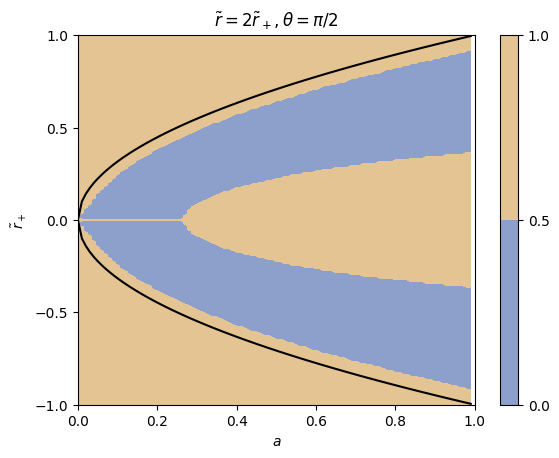

In [482]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, sum_of_angles < np.pi - 1e-8, cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\tilde{r} = 2\\tilde{r}_+, \\theta = \pi/2$');

Do sweeps across $\tilde{r}$.

In [144]:
num_r_tilde_evals = 400 # 200
r_tilde_multiplers = np.linspace(0.001, 6, num_r_tilde_evals)
# r_tilde_multiplers = np.linspace(0.001, 4, num_r_tilde_evals)

In [83]:
angle_1_maps = {}
angle_2_maps = {}
angle_3_maps = {}

In [84]:
# coarse grid
a_vals = np.arange(0, 1.01, 0.01)
r_tilde_plus_vals = np.arange(-1, 1.025, 0.025)
a_vals_grid, r_tilde_plus_vals_grid = np.meshgrid(a_vals, r_tilde_plus_vals)

In [85]:
angle_1_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
angle_2_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
angle_3_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)

with tqdm(total=np.prod(a_vals_grid.shape)) as pbar:
    for i in range(a_vals_grid.shape[0]):
        for j in range(a_vals_grid.shape[1]):
            # get angles as a function of r_tilde for given parameter values
            angle_1, angle_2, angle_3 = cond_sym(theta_val, r_tilde_plus_vals_grid[i, j], a_vals_grid[i, j])
            for k, r_tilde_mult in enumerate(r_tilde_multiplers):
                r_tilde_val = r_tilde_plus_vals_grid[i, j] + r_tilde_mult * np.abs(r_tilde_plus_vals_grid[i, j])
                angle_1_map[k, i, j] = angle_1.subs({r_tilde: r_tilde_val}).evalf()
                angle_2_map[k, i, j] = angle_2.subs({r_tilde: r_tilde_val}).evalf()
                angle_3_map[k, i, j] = angle_3.subs({r_tilde: r_tilde_val}).evalf()
            pbar.update(1)

angle_1_maps[theta_val] = angle_1_map
angle_2_maps[theta_val] = angle_2_map
angle_3_maps[theta_val] = angle_3_map

100%|██████████| 8181/8181 [5:58:15<00:00,  2.63s/it]  


In [104]:
cond_all_r_tilde = np.all(angle_1_map + angle_2_map + angle_3_map < np.pi - 1e-10, axis=0)

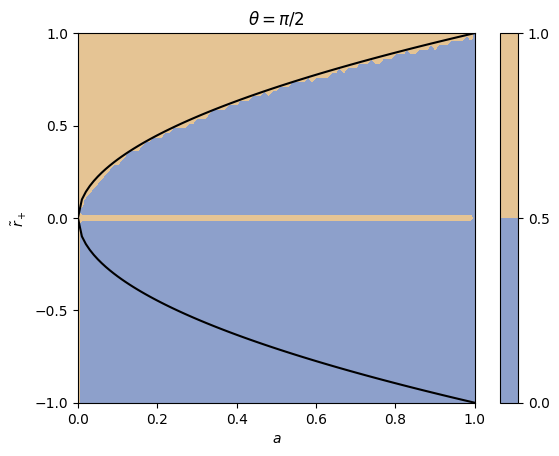

In [109]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, cond_all_r_tilde, cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/2$')
plt.savefig('../../figures/complex_eigenvalues_cond_pi_2.pdf', bbox_inches='tight', dpi=300);

In [110]:
# from complex_spacetime_metrics import complex_eigenvalues
# from multiprocessing import Pool

# import importlib
# importlib.reload(complex_eigenvalues);

# a_vals = np.arange(0, 1, 0.1)
# r_tilde_plus_vals = np.arange(-1, 1.1, 0.1)
# a_vals_grid, r_tilde_plus_vals_grid = np.meshgrid(a_vals, r_tilde_plus_vals)

# args_parallel = [
#     (theta_val, rp, av, A_val, B_val, C_val, D_val, E_val, F_val, G_val, H_val)
#     for av, rp in zip(a_vals_grid.flatten(), r_tilde_plus_vals_grid.flatten())
# ]

# processes_count = 5

# with Pool(processes_count) as pool:
#     results = pool.starmap(complex_eigenvalues.is_allowable, tqdm(args_parallel, total=len(args_parallel)))

In [111]:
# plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, np.array(results).reshape(a_vals_grid.shape), cmap='Set2')
# plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
# plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
# plt.xlabel("$a$")
# plt.ylabel("$\\tilde{r}_+$")
# plt.xlim([0, 1])
# plt.ylim([-1, 1])
# plt.yticks([-1, -0.5, 0, 0.5, 1])
# plt.colorbar()
# plt.title('$\\theta = \pi/2$');

Plot angles.

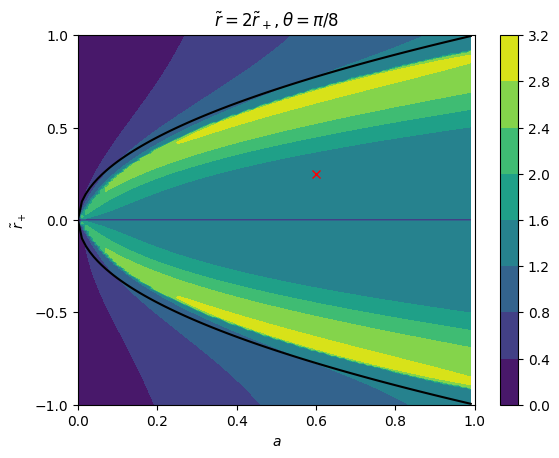

In [432]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, angle_1_maps[theta_val, r_tilde_val_template])
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(0.6, 0.25, 'rx')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\tilde{r} = 2\\tilde{r}_+, \\theta = \pi/8$');

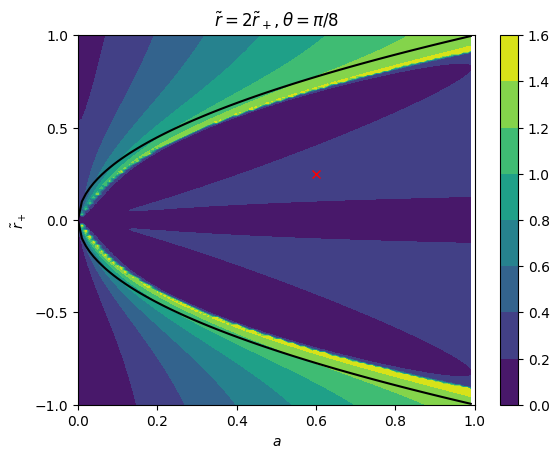

In [433]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, angle_2_maps[theta_val, r_tilde_val_template])
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(0.6, 0.25, 'rx')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\tilde{r} = 2\\tilde{r}_+, \\theta = \pi/8$');

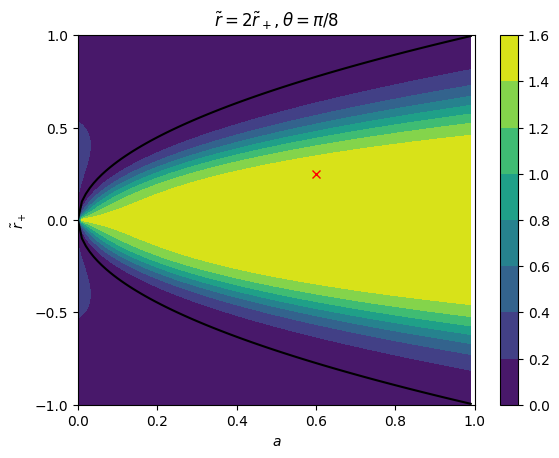

In [434]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, angle_3_maps[theta_val, r_tilde_val_template])
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(0.6, 0.25, 'rx')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\tilde{r} = 2\\tilde{r}_+, \\theta = \pi/8$');

#### $\theta = \pi/4$

In [132]:
theta_val = np.pi / 4

In [113]:
angle_1_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
angle_2_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
angle_3_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)

with tqdm(total=np.prod(a_vals_grid.shape)) as pbar:
    for i in range(a_vals_grid.shape[0]):
        for j in range(a_vals_grid.shape[1]):
            # get angles as a function of r_tilde for given parameter values
            angle_1, angle_2, angle_3 = cond_sym(theta_val, r_tilde_plus_vals_grid[i, j], a_vals_grid[i, j])
            for k, r_tilde_mult in enumerate(r_tilde_multiplers):
                r_tilde_val = r_tilde_plus_vals_grid[i, j] + r_tilde_mult * np.abs(r_tilde_plus_vals_grid[i, j])
                angle_1_map[k, i, j] = angle_1.subs({r_tilde: r_tilde_val}).evalf()
                angle_2_map[k, i, j] = angle_2.subs({r_tilde: r_tilde_val}).evalf()
                angle_3_map[k, i, j] = angle_3.subs({r_tilde: r_tilde_val}).evalf()
            pbar.update(1)

angle_1_maps[theta_val] = angle_1_map
angle_2_maps[theta_val] = angle_2_map
angle_3_maps[theta_val] = angle_3_map

100%|██████████| 8181/8181 [5:50:08<00:00,  2.57s/it]  


In [133]:
cond_all_r_tilde = np.all(angle_1_maps[theta_val] + angle_2_maps[theta_val] + angle_3_maps[theta_val] < np.pi - 1e-10, axis=0)

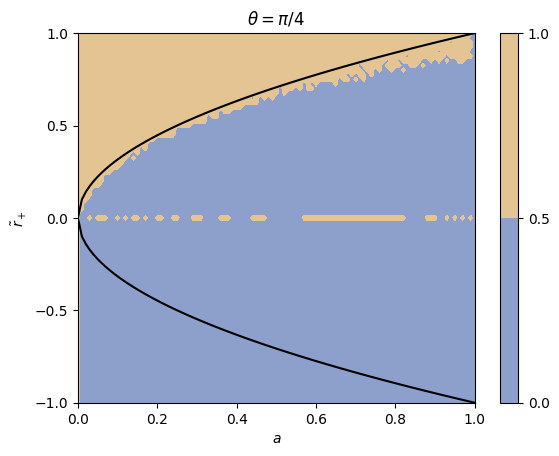

In [135]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, cond_all_r_tilde, cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/4$')
plt.savefig('../../figures/complex_eigenvalues_cond_pi_4.pdf', bbox_inches='tight', dpi=300);

#### $\theta = \pi/8$

In [145]:
theta_val = np.pi / 8

In [146]:
angle_1_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
angle_2_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
angle_3_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)

with tqdm(total=np.prod(a_vals_grid.shape)) as pbar:
    for i in range(a_vals_grid.shape[0]):
        for j in range(a_vals_grid.shape[1]):
            # get angles as a function of r_tilde for given parameter values
            angle_1, angle_2, angle_3 = cond_sym(theta_val, r_tilde_plus_vals_grid[i, j], a_vals_grid[i, j])
            for k, r_tilde_mult in enumerate(r_tilde_multiplers):
                r_tilde_val = r_tilde_plus_vals_grid[i, j] + r_tilde_mult * np.abs(r_tilde_plus_vals_grid[i, j])
                angle_1_map[k, i, j] = angle_1.subs({r_tilde: r_tilde_val}).evalf()
                angle_2_map[k, i, j] = angle_2.subs({r_tilde: r_tilde_val}).evalf()
                angle_3_map[k, i, j] = angle_3.subs({r_tilde: r_tilde_val}).evalf()
            pbar.update(1)

angle_1_maps[theta_val] = angle_1_map
angle_2_maps[theta_val] = angle_2_map
angle_3_maps[theta_val] = angle_3_map

100%|██████████| 8181/8181 [9:34:09<00:00,  4.21s/it]   


In [183]:
cond_all_r_tilde = np.all(angle_1_maps[theta_val] + angle_2_maps[theta_val] + angle_3_maps[theta_val] < np.pi - 1e-10, axis=0)

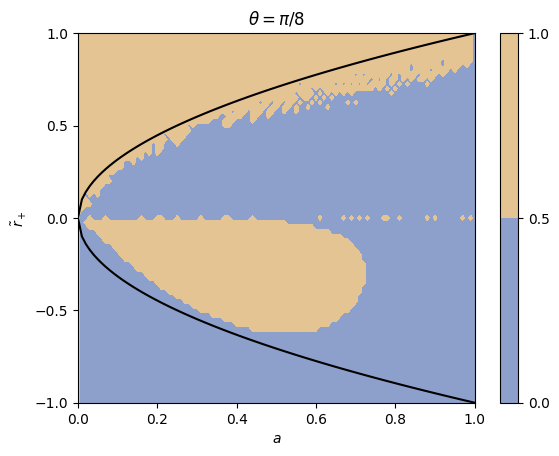

In [184]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, cond_all_r_tilde, cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/8$')
plt.savefig('../../figures/complex_eigenvalues_cond_pi_8.pdf', bbox_inches='tight', dpi=300);

#### $\theta = \pi/16$

In [143]:
theta_val = np.pi / 16

In [140]:
angle_1_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
angle_2_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
angle_3_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)

with tqdm(total=np.prod(a_vals_grid.shape)) as pbar:
    for i in range(a_vals_grid.shape[0]):
        for j in range(a_vals_grid.shape[1]):
            # get angles as a function of r_tilde for given parameter values
            angle_1, angle_2, angle_3 = cond_sym(theta_val, r_tilde_plus_vals_grid[i, j], a_vals_grid[i, j])
            for k, r_tilde_mult in enumerate(r_tilde_multiplers):
                r_tilde_val = r_tilde_plus_vals_grid[i, j] + r_tilde_mult * np.abs(r_tilde_plus_vals_grid[i, j])
                angle_1_map[k, i, j] = angle_1.subs({r_tilde: r_tilde_val}).evalf()
                angle_2_map[k, i, j] = angle_2.subs({r_tilde: r_tilde_val}).evalf()
                angle_3_map[k, i, j] = angle_3.subs({r_tilde: r_tilde_val}).evalf()
            pbar.update(1)

angle_1_maps[theta_val] = angle_1_map
angle_2_maps[theta_val] = angle_2_map
angle_3_maps[theta_val] = angle_3_map

100%|██████████| 8181/8181 [59:53<00:00,  2.28it/s]  


In [141]:
cond_all_r_tilde = np.all(angle_1_maps[theta_val] + angle_2_maps[theta_val] + angle_3_maps[theta_val] < np.pi - 1e-10, axis=0)

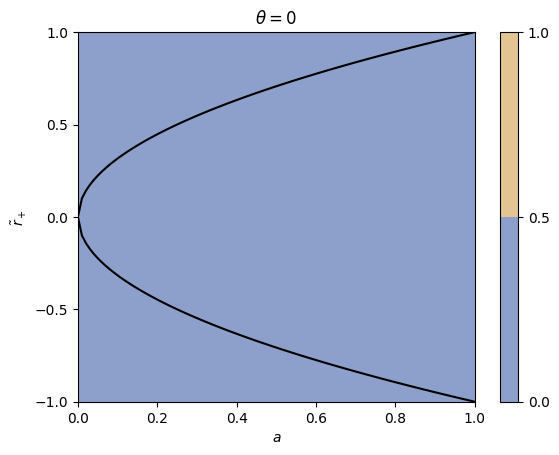

In [142]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, cond_all_r_tilde, cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = 0$')
plt.savefig('../../figures/complex_eigenvalues_cond_pi_0.pdf', bbox_inches='tight', dpi=300);